In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)
import seaborn as se; se.set()
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
from matplotlib import pyplot

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_regression

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
#from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import seaborn as sns
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv1D
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from pandas import read_csv
from pandas.plotting import scatter_matrix

from keras.layers import Dropout
from keras.constraints import maxnorm

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler, normalize

In [15]:
df = pd.read_csv('parameterWQI.csv')
df.head()

,ID STN BARU,DO\n% Sat,BOD\nmg/l,COD\nmg/l,SS\nmg/l,pH,NH3-N\nmg/l
0,4TSTU002,94.900,2.0,9.0,26.0,6.910,0.18
1,4TSTU002,97.800,4.0,10.0,20.0,7.520,0.21
2,4TSTU002,97.400,3.0,11.0,5.0,6.900,0.10
3,4TSTU002,100.100,3.0,10.0,11.0,7.000,0.40
4,4TSTU002,97.381,4.0,10.0,22.0,7.301,0.22


In [16]:
label_vectors = df['ID STN BARU'].values
feature_vectors = df.drop(['ID STN BARU'], axis=1).values

scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors_scaler = scaler.transform(feature_vectors)

In [17]:
encoding_dim = 7

input_df = Input(shape=(6,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(6, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [18]:
feature_vectors_scaler.shape

(414, 6)

In [19]:
autoencoder.fit(feature_vectors_scaler, feature_vectors_scaler, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
4/4 [==============================] - 2s 31ms/step - loss: 1.0143
Epoch 2/25
4/4 [==============================] - 0s 26ms/step - loss: 0.8008
Epoch 3/25
4/4 [==============================] - 0s 23ms/step - loss: 0.7622
Epoch 4/25
4/4 [==============================] - 0s 25ms/step - loss: 0.5883
Epoch 5/25
4/4 [==============================] - 0s 22ms/step - loss: 0.4968
Epoch 6/25
4/4 [==============================] - 0s 23ms/step - loss: 0.4525
Epoch 7/25
4/4 [==============================] - 0s 27ms/step - loss: 0.3742
Epoch 8/25
4/4 [==============================] - 0s 23ms/step - loss: 0.3588
Epoch 9/25
4/4 [==============================] - 0s 28ms/step - loss: 0.3494
Epoch 10/25
4/4 [==============================] - 0s 24ms/step - loss: 0.2628
Epoch 11/25
4/4 [==============================] - 0s 21ms/step - loss: 0.2244
Epoch 12/25
4/4 [==============================] - 0s 24ms/step - loss: 0.2967
Epoch 13/25
4/4 [==============================] - 0s 25ms/st

In [20]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 49        
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              2200

In [21]:
#autoencoder.save_weights('autoencoder.h5')

In [22]:
pred = encoder.predict(feature_vectors_scaler)

In [23]:
pred.shape

(414, 10)

In [24]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(pred)
df["clusters"]=kmeans.labels_

In [25]:
waterquality=df[df["clusters"]==0]
waterquality

,ID STN BARU,DO\n% Sat,BOD\nmg/l,COD\nmg/l,SS\nmg/l,pH,NH3-N\nmg/l,clusters
0,4TSTU002,94.900,2.0,9.0,26.0,6.910,0.18,0
1,4TSTU002,97.800,4.0,10.0,20.0,7.520,0.21,0
2,4TSTU002,97.400,3.0,11.0,5.0,6.900,0.10,0
3,4TSTU002,100.100,3.0,10.0,11.0,7.000,0.40,0
4,4TSTU002,97.381,4.0,10.0,22.0,7.301,0.22,0
...,...,...,...,...,...,...,...,...
409,4TTGG013,76.966,5.0,14.0,18.0,7.225,0.14,0
410,4TTGG001,85.873,5.0,15.0,30.0,7.159,0.21,0
411,4TTGG003,98.080,3.0,10.0,50.0,6.816,0.01,0
412,4TTGG009,74.660,4.0,16.0,30.0,6.778,0.01,0


In [26]:
#Sherlock_new_EAS_cluster0_AutoRAW.to_excel('Sherlock_new_EAS_cluster0_AutoRAW.xls', index=False)

In [27]:
print(df["clusters"])
a = waterquality(df["clusters"])

0      0
1      0
2      0
3      0
4      0
      ..
409    0
410    0
411    0
412    0
413    0
Name: clusters, Length: 414, dtype: int32


TypeError: 'DataFrame' object is not callable

In [ ]:
print(*waterquality["clusters"], sep='\n')

In [29]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

For n_clusters = 2 The average silhouette_score is : 0.8766527
For n_clusters = 3 The average silhouette_score is : 0.776315
For n_clusters = 4 The average silhouette_score is : 0.61363524
For n_clusters = 5 The average silhouette_score is : 0.48346052
For n_clusters = 6 The average silhouette_score is : 0.4840267
For n_clusters = 7 The average silhouette_score is : 0.46358413
For n_clusters = 8 The average silhouette_score is : 0.46148556
For n_clusters = 9 The average silhouette_score is : 0.3916707
For n_clusters = 10 The average silhouette_score is : 0.35229668


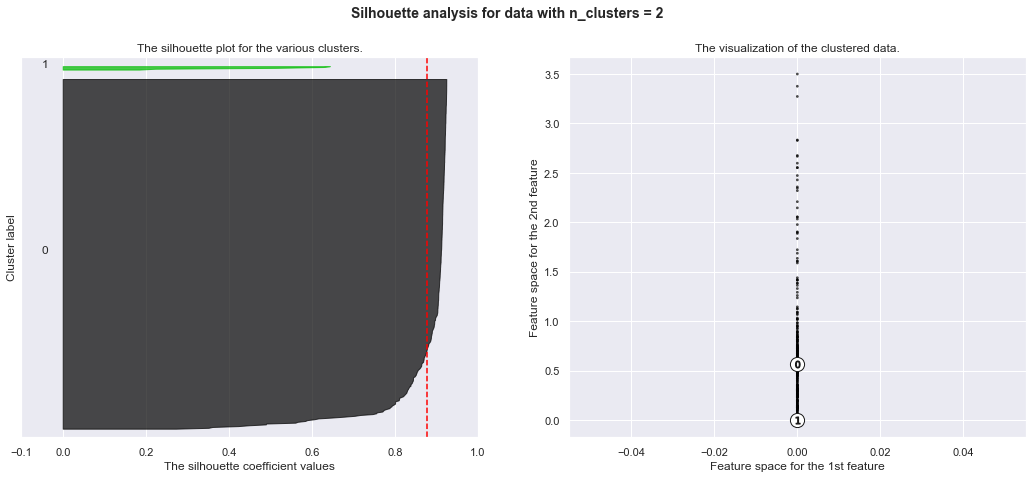

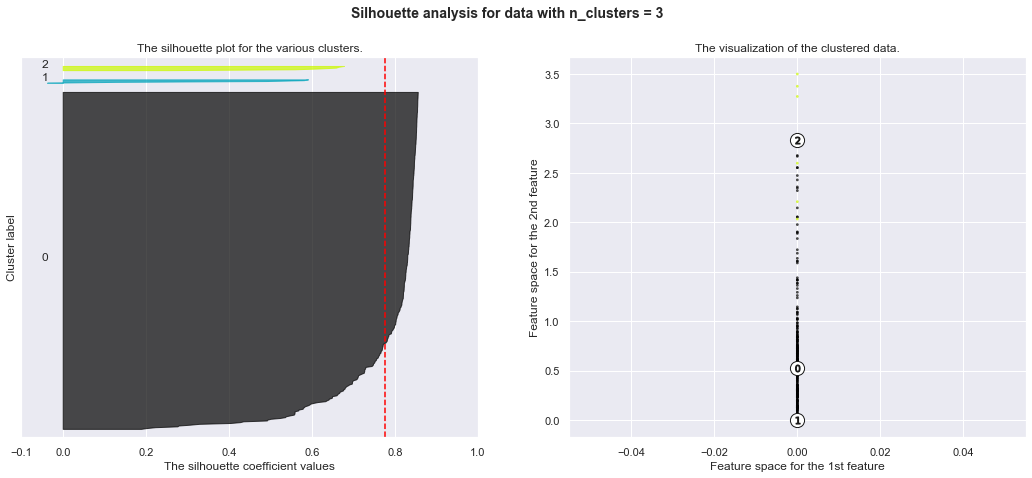

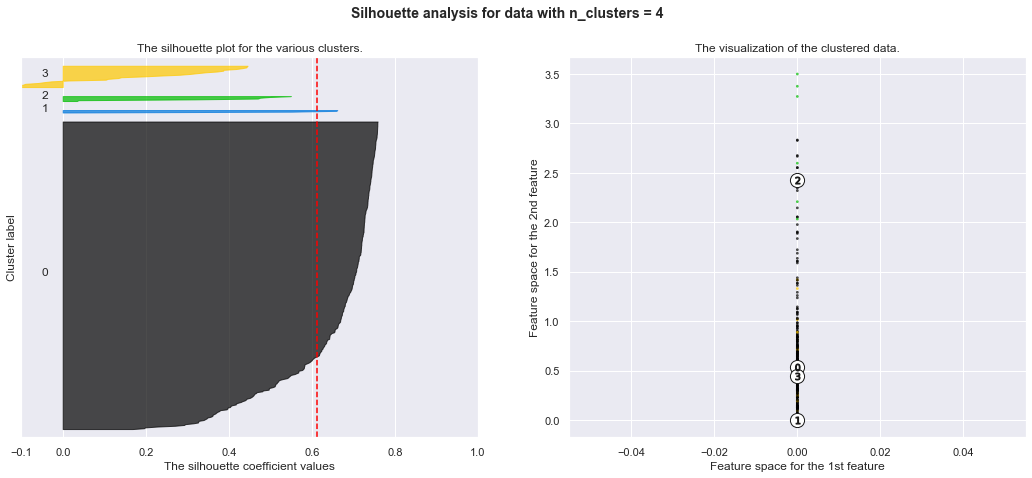

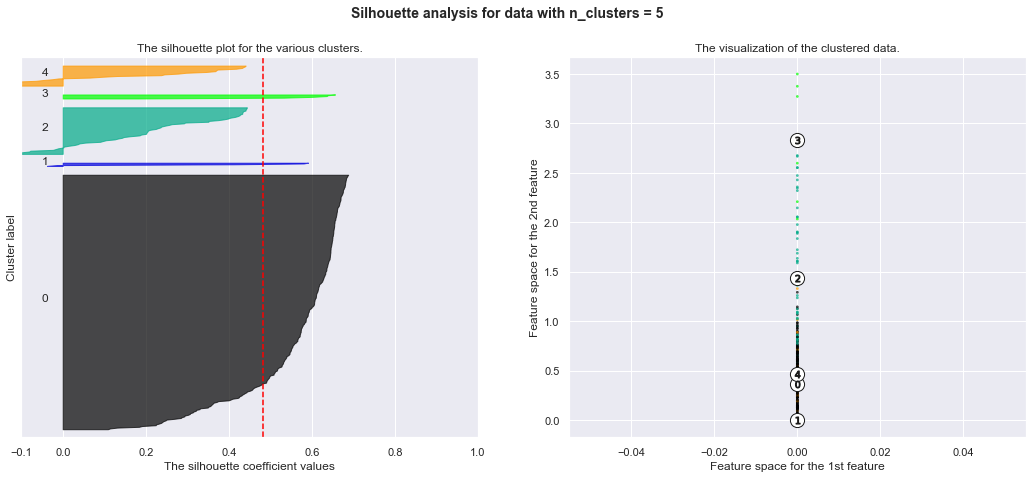

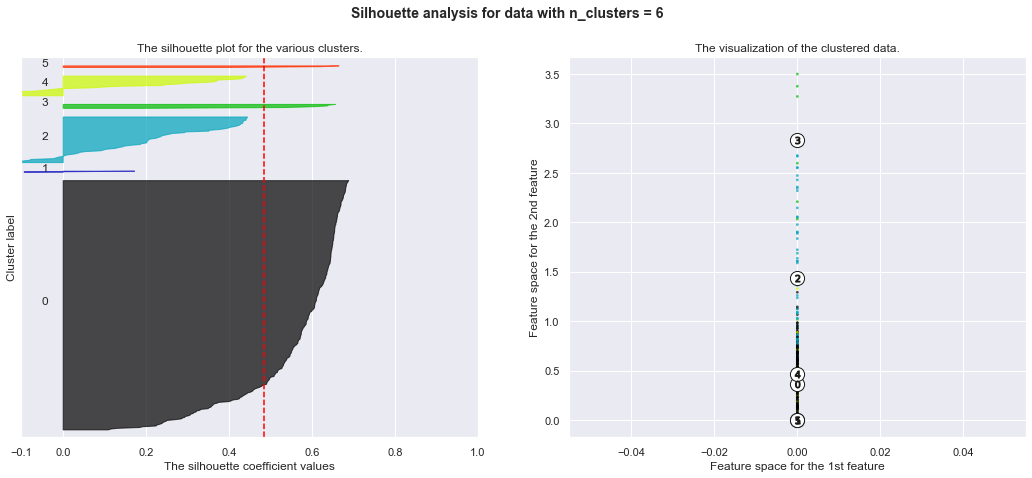

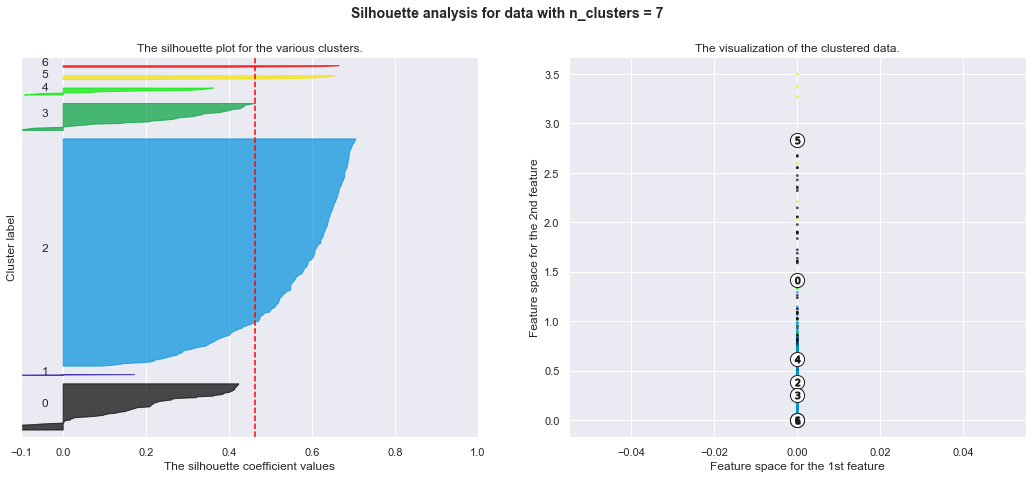

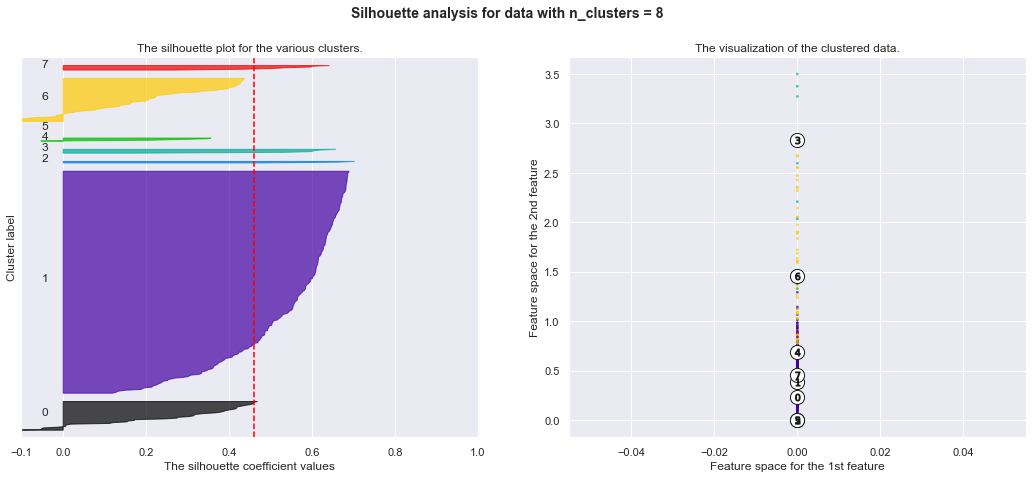

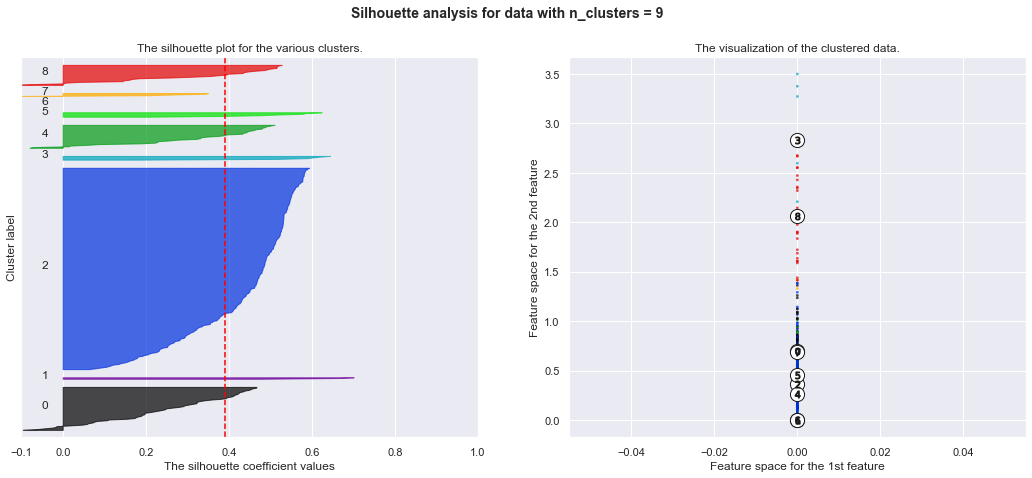

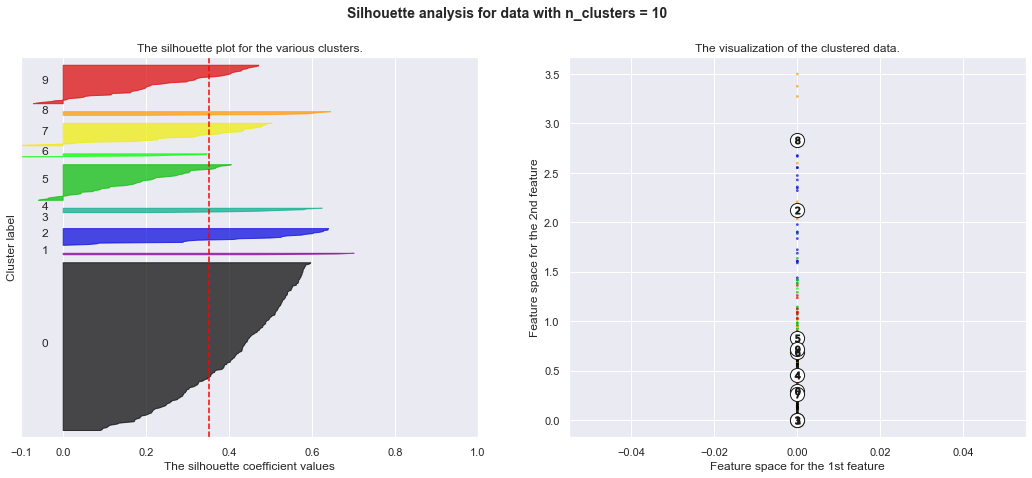

In [30]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pred) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pred)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pred, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pred, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pred[:, 0], pred[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [24]:
pred

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70972455e-02,
        2.68301725e-01, 0.00000000e+00, 0.00000000e+00, 3.61052394e-01,
        3.20897251e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.60779311e-02,
        4.08998996e-01, 0.00000000e+00, 0.00000000e+00, 3.36600393e-01,
        2.94229805e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.08615698e-02,
        4.11651701e-01, 0.00000000e+00, 7.23065808e-02, 5.92264831e-01,
        1.09164551e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.32594121e-01, 0.00000000e+00, 1.50391698e-01, 2.92306513e-01,
        1.29750594e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.12932767e-02,
        4.06281680e-01, 0.00000000e+00, 0.00000000e+00, 3.37931216e-01,
        2.24276960e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [25]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(feature_vectors)

In [26]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pred)
clusters=kmeans.labels_
print(*clusters, sep='\n')

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
2
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
2
0
2
2
2
2
2
2
0
0
1
0
0
0
0
2
0
2
2
2
2
2
2
0
2
2
2
0
1
2
1
1
2
0
0
0
2
0
0
0
0
0
2
0
0
0
0
0
2
0
0
2
0
0
0
0
0
0
0
0
2
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
2
0
2
0
0
0
2
0
2
0
2
0
2
0
2
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
2
2
0
2
0
2
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [27]:
kmeans = KMeans(2)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(feature_vectors)

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(pred)
clusters=kmeans.labels_
print(*clusters, sep='\n')

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


C:\Users\x36113nz\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

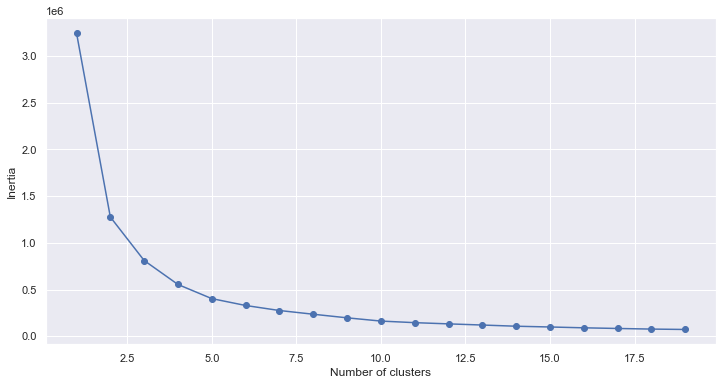

In [13]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(feature_vectors)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [14]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=6, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(feature_vectors)

KMeans(n_clusters=6)

In [15]:
kmeans.inertia_

328313.3683890118

In [16]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(feature_vectors)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\x36113nz\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


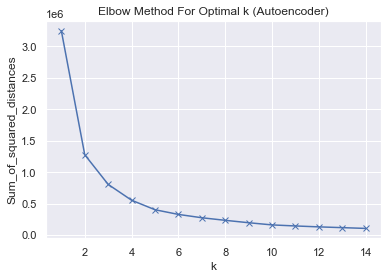

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (Autoencoder)')
plt.show()